# Parallel Beam Tomographic Reconstruction

This exercise will be about a very simplified implementation of tomographic
reconstruction, using filtered backprojection.

The exercise consists of four parts:
First, you will simulate the data aquisistion in computed tomography, by
calculating the sinogram from a given input sample slice.
Second, you will have to apply a ramp filter to this sinogram.
Third, you will implement a simple backprojection algorithm.
In the fourth part you will reconstruct an unknown sample from a sinogram.

If you do not manage to do one part of the exercise you can still go on by
loading the provided .npy arrays 'sino_backup.npy' and
'filtered_sino_backup.npy'.

You need to replace the ??? in the code with the required commands.

In [5]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

## Part 1: Forwardprojection

Read in sample data of a human head. In reality, this data is unknown and what you are
looking for when performing a CT scan.

In [6]:
sample_RGB = plt.imread('SheppLogan_Phantom.png') # This image is RGB, so we have three axes: rows, columns and color
sample = np.mean(sample_RGB, axis = -1) # We found the mean of all color images to only get one
print(sample_RGB.shape)
print(sample.shape)

(1200, 1200, 3)
(1200, 1200)


Define array containing the projection angles. We want equidistant sampling over $360^\circ$. 

(Don't include $0^\circ = 360^\circ$ twice!)

In [7]:
Nangles = 501
angles = np.linspace(0, 360, Nangles) 
angles = np.delete(angles, -1) # Eliminates de last element (360) of the array angles
print(angles)

[  0.     0.72   1.44   2.16   2.88   3.6    4.32   5.04   5.76   6.48
   7.2    7.92   8.64   9.36  10.08  10.8   11.52  12.24  12.96  13.68
  14.4   15.12  15.84  16.56  17.28  18.    18.72  19.44  20.16  20.88
  21.6   22.32  23.04  23.76  24.48  25.2   25.92  26.64  27.36  28.08
  28.8   29.52  30.24  30.96  31.68  32.4   33.12  33.84  34.56  35.28
  36.    36.72  37.44  38.16  38.88  39.6   40.32  41.04  41.76  42.48
  43.2   43.92  44.64  45.36  46.08  46.8   47.52  48.24  48.96  49.68
  50.4   51.12  51.84  52.56  53.28  54.    54.72  55.44  56.16  56.88
  57.6   58.32  59.04  59.76  60.48  61.2   61.92  62.64  63.36  64.08
  64.8   65.52  66.24  66.96  67.68  68.4   69.12  69.84  70.56  71.28
  72.    72.72  73.44  74.16  74.88  75.6   76.32  77.04  77.76  78.48
  79.2   79.92  80.64  81.36  82.08  82.8   83.52  84.24  84.96  85.68
  86.4   87.12  87.84  88.56  89.28  90.    90.72  91.44  92.16  92.88
  93.6   94.32  95.04  95.76  96.48  97.2   97.92  98.64  99.36 100.08
 100.8

Simulate the process of tomographic data acquisition by line projections.

In [8]:
"""
Simulate data aquisition in tomography from line projections.
Forwardproject a given input sample slice to obtain a simulated sinogram.

Hints
-----
Use scipy.ndimage.rotate(..., reshape=False) to simulate the sample
rotation.
Use numpy.sum() along one axis to simulate the line projection integral.
"""
sh = np.shape(sample)                # Size of the image matrix
Nproj = len(angles)                  # Number of elements in the array angles = Number of angles = 300

# define empty sinogram container, angles along y-axis
sinogram = np.zeros((Nproj, sh[1]))

# loop over all projections
for i in range(Nproj): # i goes from 0 to 299
    print("Simulating:     %03i/%03i" % (i+1, Nproj), end="\r", flush=True)

    im_rot = nd.rotate(sample, angles[i], reshape=False)
    sinogram[i, :] = np.sum(im_rot, axis=0) # The i-th row of the synogram is equal to the 1D profile obtaining from the sum of the columns of im_rot

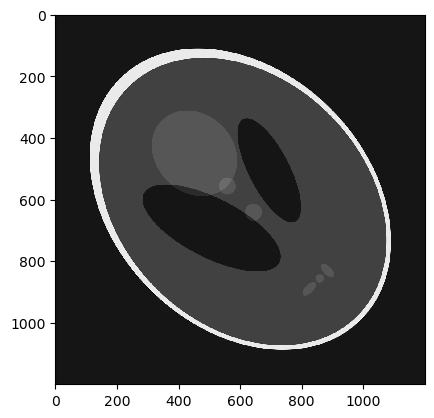

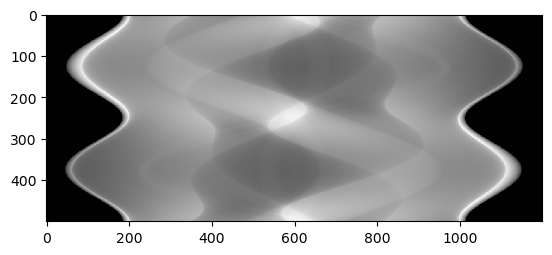

In [9]:
plt.figure()
plt.imshow(nd.rotate(sample, 45, reshape=False))

plt.figure()
plt.imshow(sinogram)

In [10]:
# use this line if you do not manage the forward projection
#sinogram = np.load('sino_backup.npy')

In [11]:
# For Part 4 - if you sucessfully implemented Part 2 and Part 3 you can reconstruct this unknown sinogram:
#sample = plt.imread('unknown_CT_scan.jpg')
#sinogram = -np.log(np.load('unknown_sinogram_1600.npy').T)
#Nangles = 1600
#angles = np.linspace(0, 180, Nangles, endpoint=False)

## Part 2: Filter sinogram

The loaded sinogram, more precise: each projection function, is now filtered with the ramp (Ram-Lak) filter.

(1200,)
1200


Text(0, 0.5, 'frequencies')

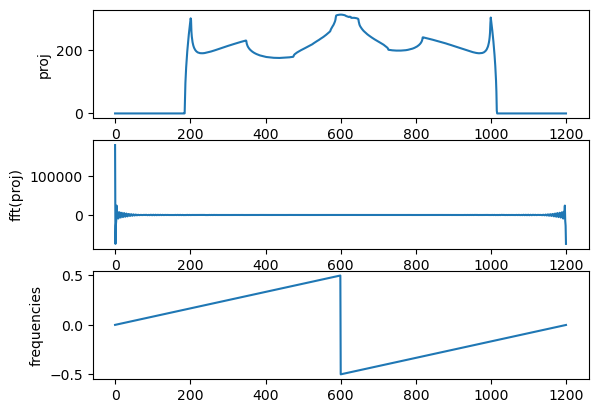

In [12]:
# As an example how numpy works with fourier transform we look at the first projection function p_0.
# When fourier transforing it we get an array which stors the low frequencies at the edges and the high frequencies
# in the centre. This can also be seen when calling the np.fft.fftfreq function which returns us the frequency 
# of each index in the fourier transformed array.
p_0 = sinogram[0, :]
plt.subplot(311)
plt.plot(p_0)
plt.ylabel('proj')

P_0 = np.fft.fft(p_0)
plt.subplot(312)
plt.plot(P_0.real)
plt.ylabel('fft(proj)')

Npix = p_0.shape[0]
print(p_0.shape)
print(Npix)
plt.subplot(313)
plt.plot(np.fft.fftfreq(Npix))
plt.ylabel('frequencies')

In [13]:
"""
Filter a given sinogram using a ramp filter

Hints:
First define a ramp filter in Fourier domain (you can use np.fft.fftfreq).
Filter the sinogram in Fourier space using the convolution theorem.
"""

Nproj, Npix = np.shape(sinogram)

# Generate basic ramp filter (hint: there is the function np.fft.fftfreq.
# Try it and see what it does. Watch out for a possible fftshift)
kx = np.fft.fftfreq(Npix) # Frequency axis
ramp_filter = np.abs(kx) ## m # Ramp filter = |kx| 

# filter the sinogram in Fourier space in detector pixel direction
# Use the np.fft.fft along the axis=1
sino_ft = np.fft.fft(sinogram, axis=1) ## m # We apply 1D Fourier transform to each row (axis=1 goes from left to right, along each row component)

# Multiply the ramp filter onto the 1D-FT of the sinogram and transform it
# back into spatial domain
filtered_sino = np.real(np.fft.ifft(sino_ft*ramp_filter, axis=1)) ## m # We found the real part of the filtered sinogram (filtered for each row)

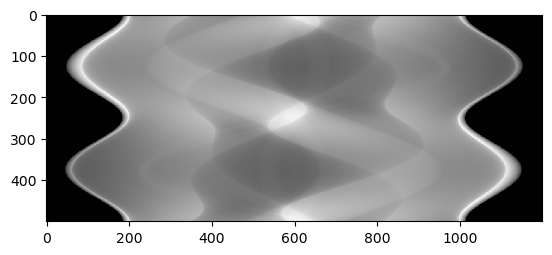

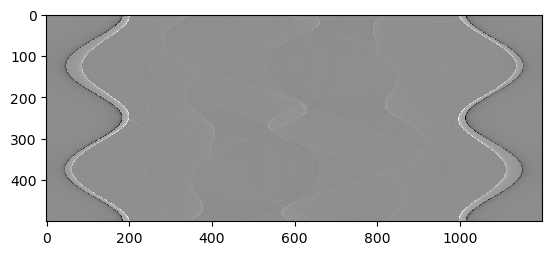

In [14]:
plt.figure()
plt.imshow(sinogram)

plt.figure()
plt.imshow(filtered_sino)

In [15]:
# use this line if you do not manage the filtering
#filtered_sino2 = np.load('filtered_sino_backup.npy')

## Part 3: Backprojection

The filtered sinogram must now be backprojected similar to the apporach in step 1.

In [16]:
"""
Backproject a given sinogram.

Hints:
Perform the backprojection inversely to the way we did the
forwardprojection, by smearing each projection in the sinogram back along
the axis that you summed before in forwardproject(),
then rotating the resulting backprojection
to get the right backprojection angle.

Use scipy.ndimage.rotate(..., ..., reshape=False)
"""

# define empty container for reconstruction of sample
Nproj, Npix = np.shape(filtered_sino)
reconstruction = np.zeros((Npix, Npix))

# loop over all projections
for i in np.arange(Nproj): 
    print("Reconstructing: %03i/%i" % (i+1, Nproj), end="\r", flush=True)

    backprojection = np.tile(filtered_sino[i, :], (Npix, 1)) ##m # We create an image which is the repetition of the i-th row of the filtered..
    #...sinogram along the direction of the rows, i.e this image is constructed by appending Npix times the i-th row, one below the other. This...
    #...image is called the backprojection, but we have first to rotate this backprojection by certain angle
    backprojection = backprojection/Npix  # Just normalization
    rotated_backprojection = nd.rotate(backprojection, -angles[i], reshape=False) ##m #We rotate the backprojection depending on the
    #angle of the backprojection. Previously, to obtain the sinogram (forward projection), we rotate the sample by an angle "angles[i]"". Now...
    #...we want to do the opposite (the backprojection for the angle[i]). Since we have to do the inverse approach, the angle of rotation...
    #...must be -angle[i] for the backprojection, since we need the inverse of the forward projection.

    # Add the rotated backprojection
    reconstruction = reconstruction + rotated_backprojection ##m # The final reconstruction is the sum of all the rotated backprojections...
    #...that we found in each iteration of the for loop 

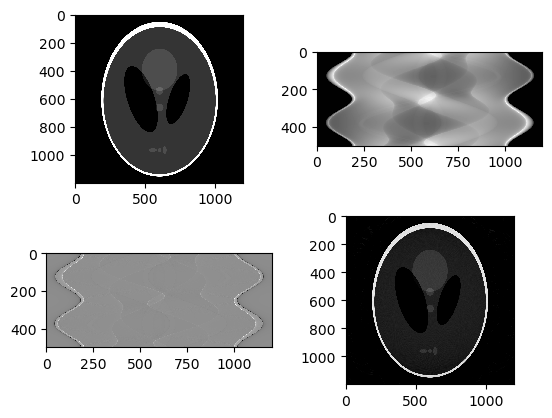

In [17]:
# please include this figure in your report (showing the head phantom reconstruction)
plt.figure()
plt.subplot(221)
plt.imshow(sample, vmin=0.)
plt.subplot(222)
plt.imshow(sinogram)
plt.subplot(223)
plt.imshow(filtered_sino)
plt.subplot(224)
plt.imshow(reconstruction, vmin=0.)

## Part 4: Reconstruct unknown Sinogram
After you successfully implemented Part 2 and 3 (filtering and backprojection) you can now reconstruct an unknown sample from its sinogram. Please scroll up to the cell just before Part 2 and uncomment all lines except the first one and re-run the subsequent cells. Reconstruction might take a while.

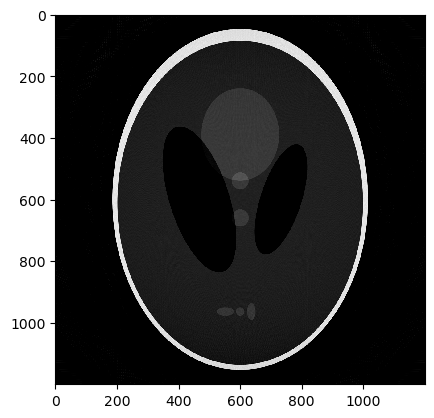

In [18]:
# you can also include this figure in your report
plt.imshow(reconstruction, vmin=0.)